<a href="https://colab.research.google.com/github/invinciblebansal/MetaPool/blob/main/MetaPool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as  plt
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import random

In [ ]:
import zipfile

zip_files = ['train']

for zip_file in zip_files:
    with zipfile.ZipFile("/content/dataset2.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))


FileNotFoundError: ignored

In [ ]:
TRAIN_DIR_PATH = '/content/himanshu'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))
def to_dataframe(file_names):
    files, labels = list(), list()
    for file in file_names:
        files.append(file)
        labels.append(file[:3])
    df = pd.DataFrame({'filename':files, 'label':labels})
    return df

df = to_dataframe(file_names)

There are 501 number of images in directory.


In [ ]:
class_name=['himanshu']

In [ ]:
df.head()

,filename,label
0,himanshu.90.jpg,him
1,himanshu.109.jpg,him
2,himanshu.94.jpg,him
3,himanshu.146.jpg,him
4,himanshu.406.jpg,him


In [ ]:
X= df['filename']
Y=df['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

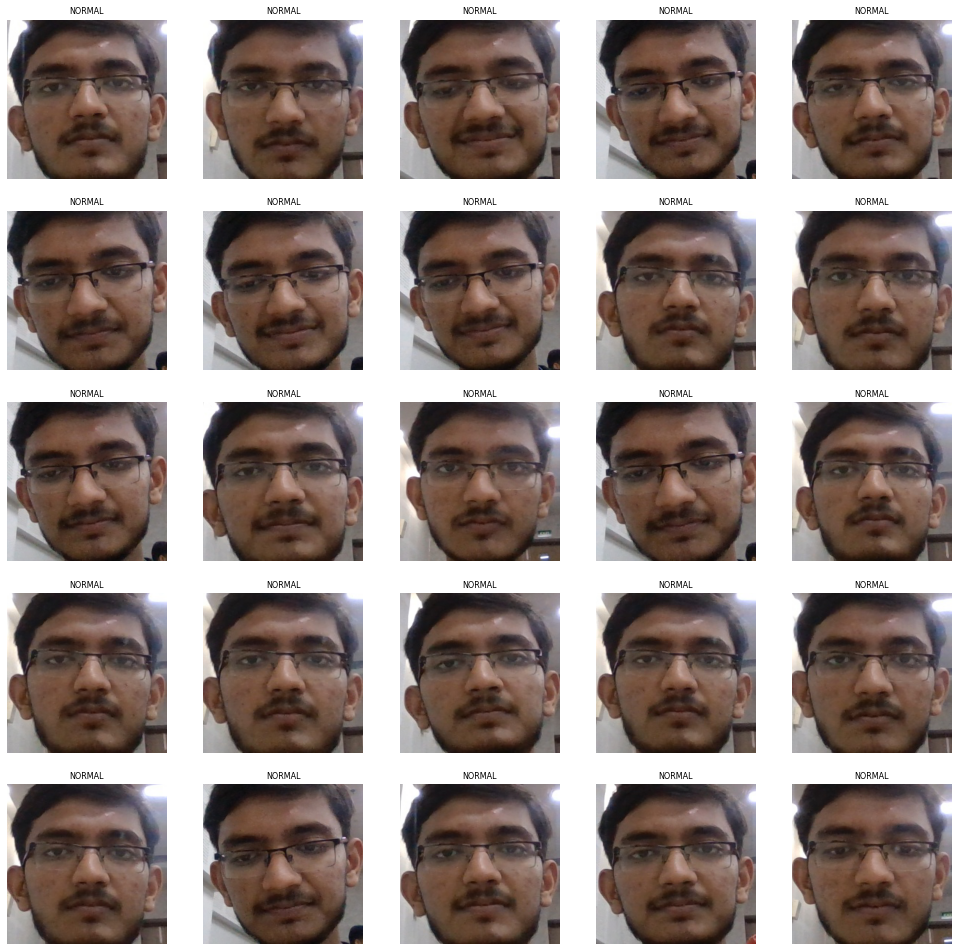

In [ ]:
W = 5
H = 5
fig, ax = plt.subplots(W, H, figsize = (17,17))

ax = ax.ravel() # flaten the matrix into array
for i in np.arange(0, W * H): 
    label ='NORMAL'
    class_dir = os.path.join(r"/content/himanshu")
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    ax[i].imshow( img )
    ax[i].set_title(label, fontsize = 8) # the label
    ax[i].axis('off')

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = X_train,
    directory = files + "train/",
    x_col = "file",
    y_col = "label",
    class_mode = "categorical",
    target_size = (224, 224),
    batch_size = 128,
    seed = 666)
                                                      
validation_datagen = ImageDataGenerator(rescale=1./255)

NameError: ignored

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))
